# 4.8 Lab: Model Development - Used Car Pricing

In [1]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = "usedcars.csv"
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# 1. Linear Regression and Multiple Linear Regression

## Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lm = LinearRegression()
lm

LinearRegression()

In [4]:
X = df[['highway-mpg']]
Y = df['price']

In [5]:
# Fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [6]:
# We can output a prediction:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
lm.intercept_

38423.305858157386

In [8]:
lm.coef_

array([-821.73337832])

In [9]:
# Create a linear regression object called "lm1"
lm1 = LinearRegression()
lm1

LinearRegression()

In [10]:
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)
lm1

LinearRegression()

In [11]:
# Find the slope and intercept of the model
lm1.coef_

array([166.86001569])

In [12]:
lm1.intercept_

-7963.338906281049

In [13]:
# What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".
Yhat = lm1.intercept_ + lm1.coef_ * X

## Multiple Linear Regression

In [14]:
# Let's develop a model using the following variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [15]:
# Fit the linear model using the four above-mentioned variables
lm.fit(Z, df['price'])

LinearRegression()

In [16]:
lm.intercept_

-15806.624626329198

In [17]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [18]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", 
# and the predictor variable is "normalized-losses" and "highway-mpg"
Y = df['price']
Z = df[['normalized-losses', 'highway-mpg']]
lm2 = LinearRegression()
lm2.fit(Z,Y)

LinearRegression()

In [19]:
# Find the coefficient of the model
lm2.coef_

array([   1.49789586, -820.45434016])

## 2. Model Evaluation Using Visualization

## 2.1 Regression Plot

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# When it comes to simple linear regression, an excellent way to visualize the fit of our model is 
# by using regression plots.
# This plot will show a combination of a scattered data points (a scatterplot), 
# as well as the fitted linear regression line going through the data. 
# This will give us a reasonable estimate of the relationship between the two variables, 
# the strength of the correlation, as well as the direction (positive or negative correlation).

(0.0, 48162.90517019184)

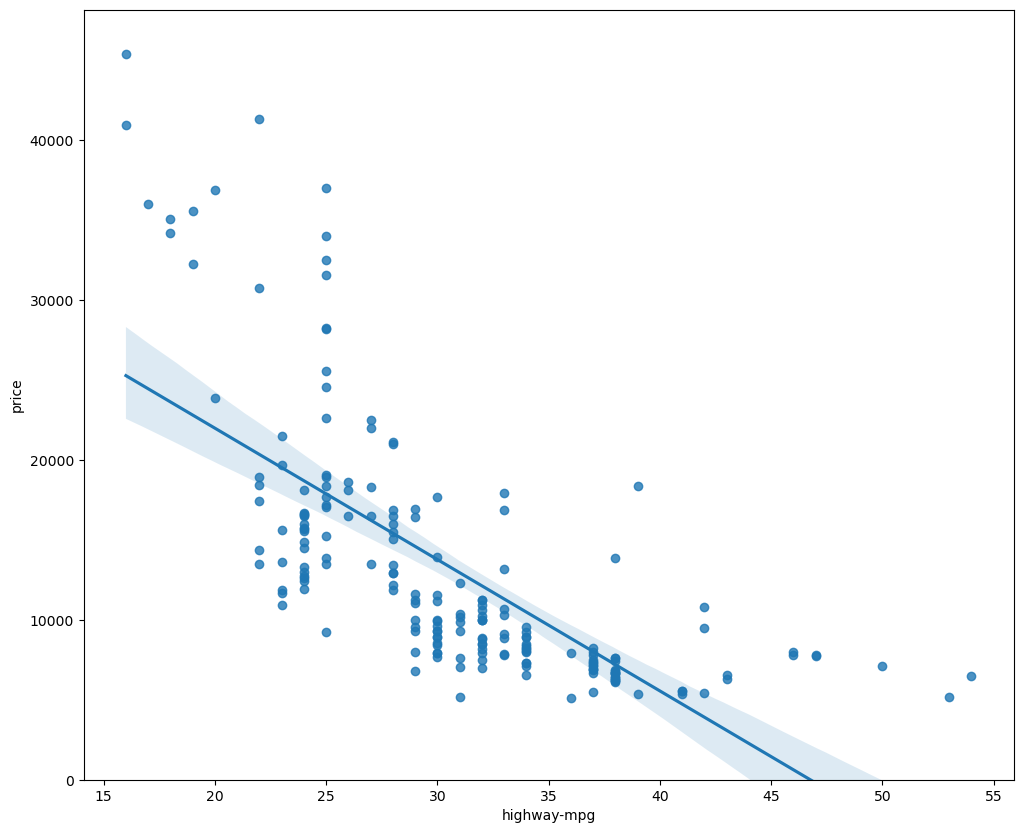

In [21]:
# Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

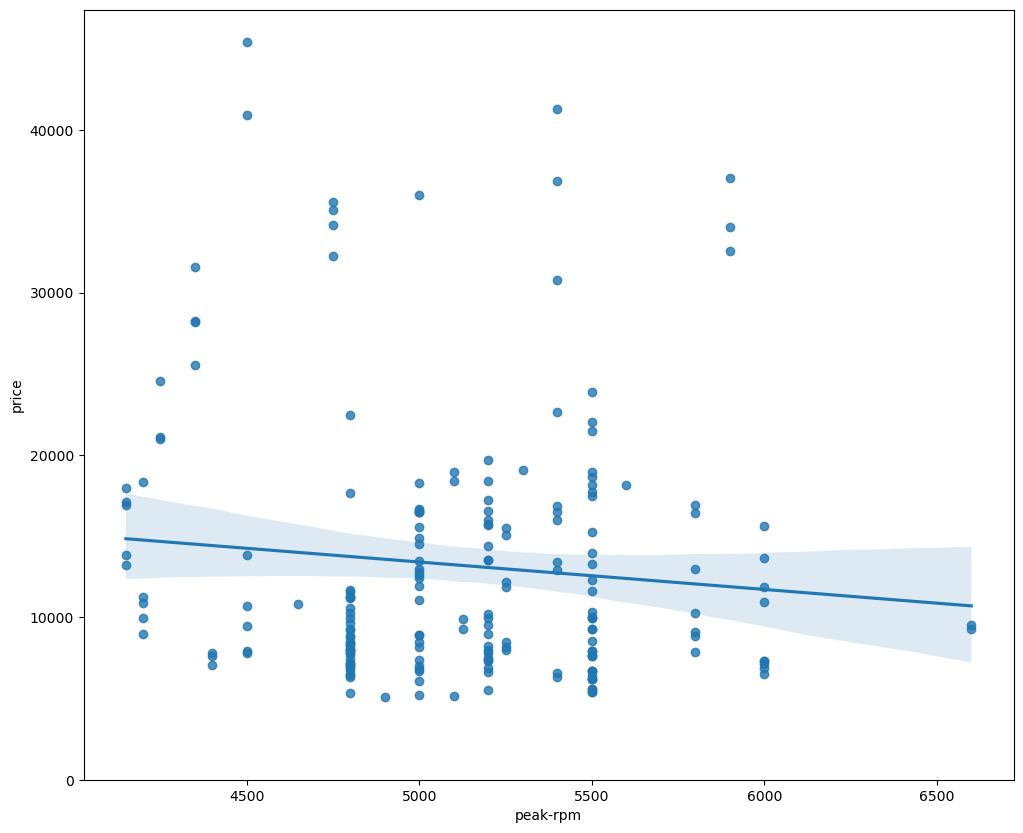

In [22]:
# Let's compare this plot to the regression plot of "peak-rpm":
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
# Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to
# the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line 
# and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" 
#increases.

In [23]:
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


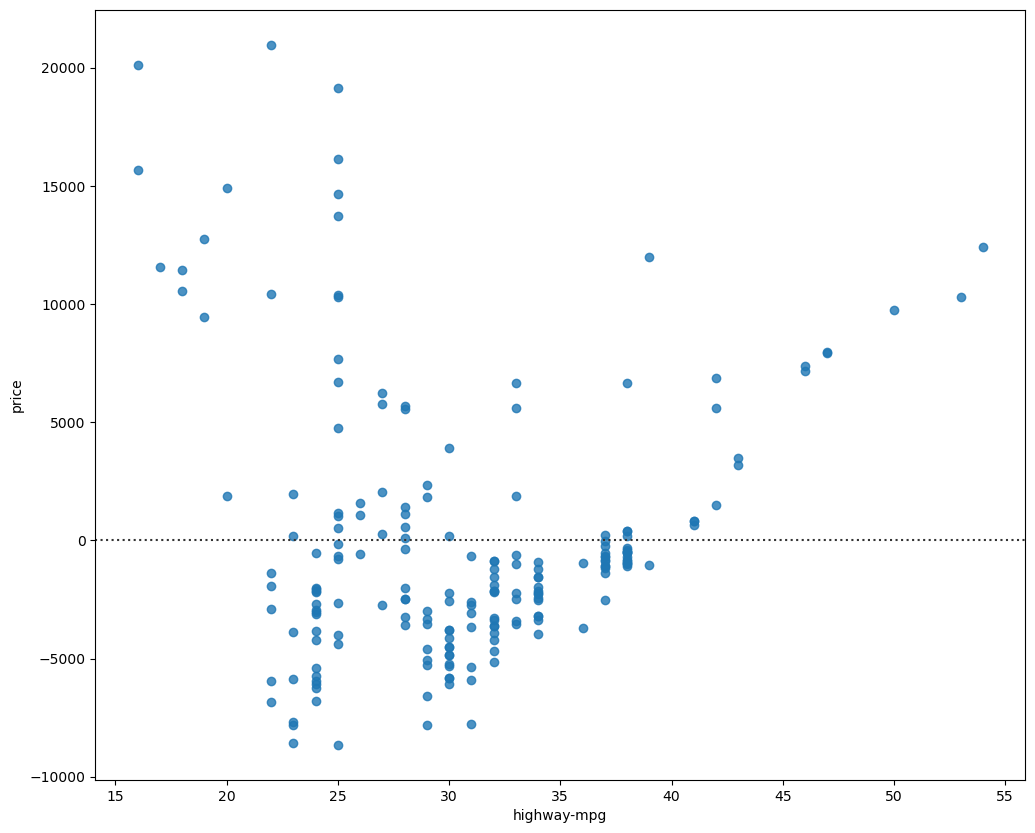

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)

C:\Users\boert\AppData\Local\Temp\ipykernel_2532\373618801.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\boert\AppData\Local\Temp\ipykernel_2532\373618801.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

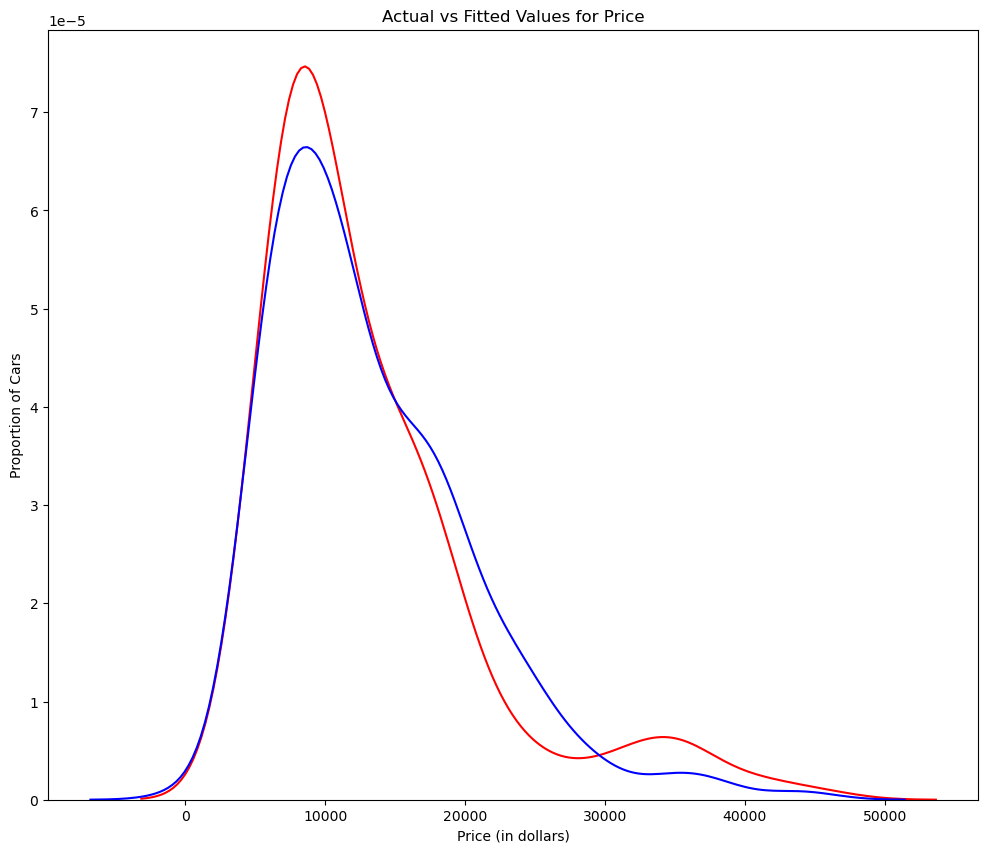

In [26]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [28]:
x = df['highway-mpg']
y = df['price']

In [29]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


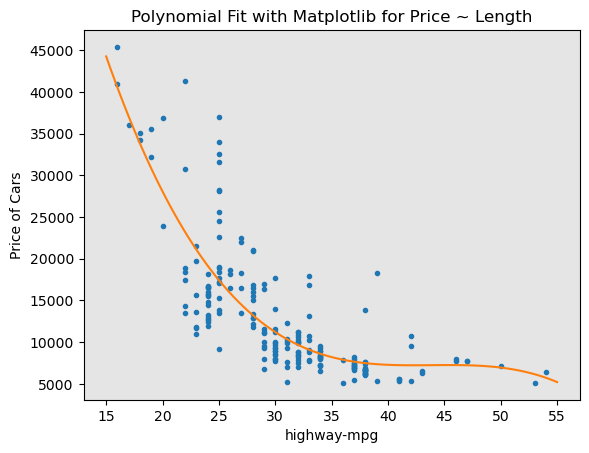

In [30]:
PlotPolly(p, x, y, 'highway-mpg')

In [31]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [32]:
# Question 4
# Create 11 order polynomial model with the variables x and y from above.
f = np.polyfit(x, y, 11)
p2 = np.poly1d(f)
print(p2)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


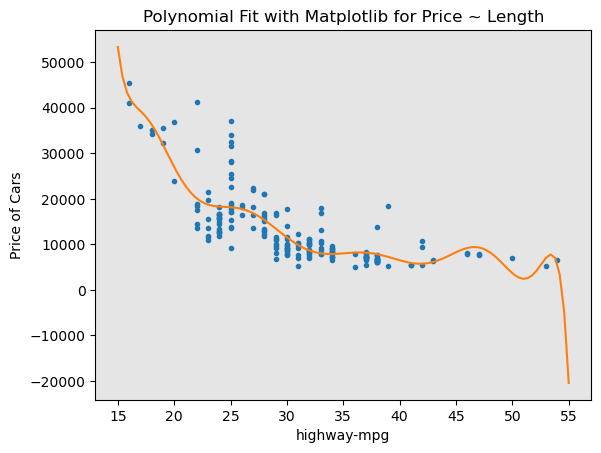

In [33]:
PlotPolly(p2, x, y, 'highway-mpg')

In [34]:
# The analytical expression for Multivariate Polynomial function gets complicated. 
# For example, the expression for a second-order (degree=2) polynomial with two variables is given by:
from sklearn.preprocessing import PolynomialFeatures
# Now, we create a PolynomialFeatures object of degree 2:
pr = PolynomialFeatures(degree=2)
print(pr)
Z_pr = pr.fit_transform(Z)
Z.shape
Z_pr.shape

PolynomialFeatures()


(201, 15)

## Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# We create the pipeline by creating a list of tuples including the name of the model or estimator 
# and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [37]:
# We input the list as an argument to the pipeline constructor:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
# First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs. Then, we can normalize the data, perform a transform and fit the model simultaneously:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [40]:
# Question 5
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression 
# model using the features Z and target y.
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 4. Measures for In-Sample Evaluation

In [41]:
# Two very important measures that are often used in Statistics to determine the accuracy of a model are:
## R^2 / R-squared
## Mean Squared Error (MSE)

## Model 1: Simple Linear Regression

In [42]:
# Let's calculate the R^2:
lm.fit(X,Y)  # fits the linear model
# Find the R^2:
print('The R-square is: ', lm.score(X,Y))
# lm.score returns the coefficient of determination of the prediction
# Now, we can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"!

The R-square is:  0.7609686443622008


In [43]:
# Let's calculate the MSE:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [44]:
# Let's import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

In [45]:
# We can compare the predicted results with the actual results:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


## Model 2: Multiple Linear Regression

In [47]:
# Z = df[['normalized-losses', 'highway-mpg']]  ???
lm.fit(Z, df['price'])
print('The R-square is: ', lm.score(Z, df['price']))
# We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit":

The R-square is:  0.8093562806577457


In [49]:
# Let's calculate the MSE:
Y_predict_multifit = lm.predict(Z)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


## Model 3: Polynomial Fit

In [50]:
# Let’s import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
# We can say that ~67.419 % of the variation of price is explained by this polynomial fit:

The R-square value is:  0.6741946663906522


In [51]:
# Let's calculate the MSE:
mean_squared_error(df['price'], p(x))

20474146.426361203

# 5. Prediction and Decision Making

## 5.1 Prediction

In the previous section, we trained the model using the method fit(). Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.


In [55]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [56]:
# Create a new input
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [57]:
# fit the model
lm.fit(X, Y)
lm

LinearRegression()

In [58]:
# Produce a prediction
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\boert\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

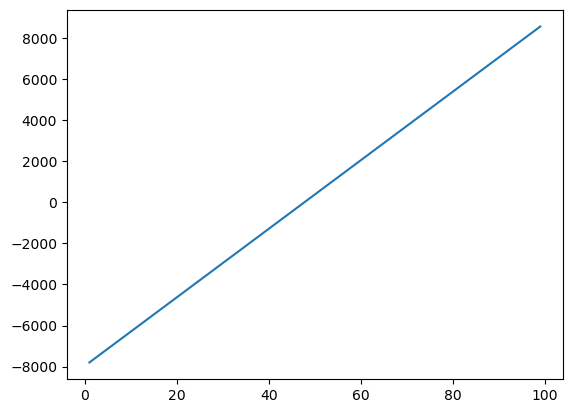

In [59]:
# We can plot the data
plt.plot(new_input, yhat)
plt.show()